In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('../input/insurance/insurance.csv')

In [3]:
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# check for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [10]:
data.sex=label_encoder.fit_transform(data.sex)
data.smoker=label_encoder.fit_transform(data.smoker)
data.region=label_encoder.fit_transform(data.region)

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [13]:
data.shape

(1338, 7)

In [14]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


1338 rows 7 columns with no null values.

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


implementing linear regression

In [16]:
y=data['charges']
X=data.drop(['charges'],axis=1)

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model

In [18]:
reg = linear_model.LinearRegression() 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
reg.score(X_test,y_test)

0.7587936506319961

In [22]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

the region is least related to the charges column we can do some prediction without the region column although it is important and should not be dropped.

In [23]:
X_new=X.drop(['region'],axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20)

In [25]:
reg_1 = linear_model.LinearRegression() 

In [26]:
reg_1.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
reg_1.score(X_test,y_test)

0.7125626528430042

##### Let's understand the trends in the data by visualizing all the aspects.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data_1=pd.read_csv('../input/insurance/insurance.csv')

In [30]:
data_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
correlation=data.corr()

In [32]:
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


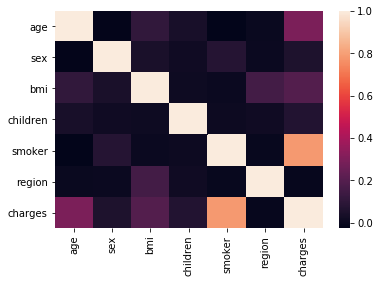

In [33]:
sns.heatmap(correlation)

region is least related to  charges.

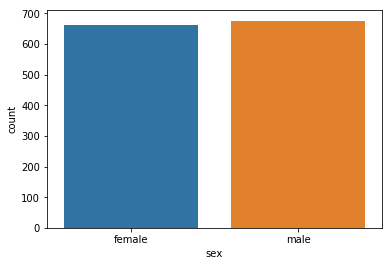

In [34]:
# no of male and females in the complete dataset

sns.countplot(data_1['sex']);

We have almost the same number of both male and females.

In [35]:
data_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
data_1['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [37]:
data_1['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

youngest memeber in the dataset is 18 years old and the eldest is 64.

analysing every memeber of the dataset together will not be fair as their lifestyles are different their way of living is different .we can't compare a 18 years old person to a 64 years old person in any respect.
there are various factors and aspects in our day-to-day routine which led to major changes in our lives.

this is the reason i am dividing this dataset in 4 parts on the basis of age.
###### Age intervals are   [18-25 ,  26-34  ,  35-49  ,  50-64]

In [38]:
#data of people who are between 18 and 25

data_u25=data_1[data_1['age']<=25]

In [39]:
data_u25.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
10,25,male,26.22,0,no,northeast,2721.3208
12,23,male,34.40,0,no,southwest,1826.8430
15,19,male,24.60,1,no,southwest,1837.2370


In [40]:
# people who are between 26 and 34

data_u34=data_1.loc[(data_1['age']>=26) & (data_1['age']<=34)]

In [41]:
data_u34.head()

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
14,27,male,42.130,0,yes,southeast,39611.75770


In [42]:
# between 35 and 49

data_u49=data_1.loc[(data_1['age']>=35) & (data_1['age']<=49)]

In [43]:
data_u49.head()

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
24,37,male,28.025,2,no,northwest,6203.90175
38,35,male,36.670,1,yes,northeast,39774.27630


In [44]:
# people who are between 50 and 64

data_u64=data_1.loc[(data_1['age']>=50) & (data_1['age']<=64)]

In [45]:
data_u64.head()

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
13,56,female,39.82,0,no,southeast,11090.71780
16,52,female,30.78,1,no,northeast,10797.33620
18,56,male,40.30,0,no,southwest,10602.38500


the four intervals of the dataset are 

 [18-25 ,  26-34  ,  35-49  ,  50-64]

and the corresponding datasets are 

data_u25,  data_u34  ,  data_u49  ,  data_u64


In [46]:
def shape(df):
    print(df.shape)

In [47]:
shape(data_1)
shape(data_u25)
shape(data_u34)
shape(data_u49)
shape(data_u64)

(1338, 7)
(306, 7)
(243, 7)
(404, 7)
(385, 7)


### These are the relations we will be visualising to understand the dataset in a better way and conclude some important things.

#### 1. BMI and charges relation.
#### 2.Age and charges relation.
#### 3.Smoker charges relation.
#### 4.No of smokers men and women.
#### 5.Region and charges relation .  
#### 6.No of healthy people we have.

In [48]:
def scatter_plot(x,y,x_heading,y_heading) :  
    plt.scatter(x=x,y=y)
    plt.xlabel(x_heading)
    plt.ylabel(y_heading)

For most adults, an ideal BMI is in the 18.5 to 24.9 range.

If your BMI is:

below 18.5 – you're in the underweight range

between 18.5 and 24.9 – you're in the healthy weight range

between 25 and 29.9 – you're in the overweight range

between 30 and 39.9 – you're in the obese range 

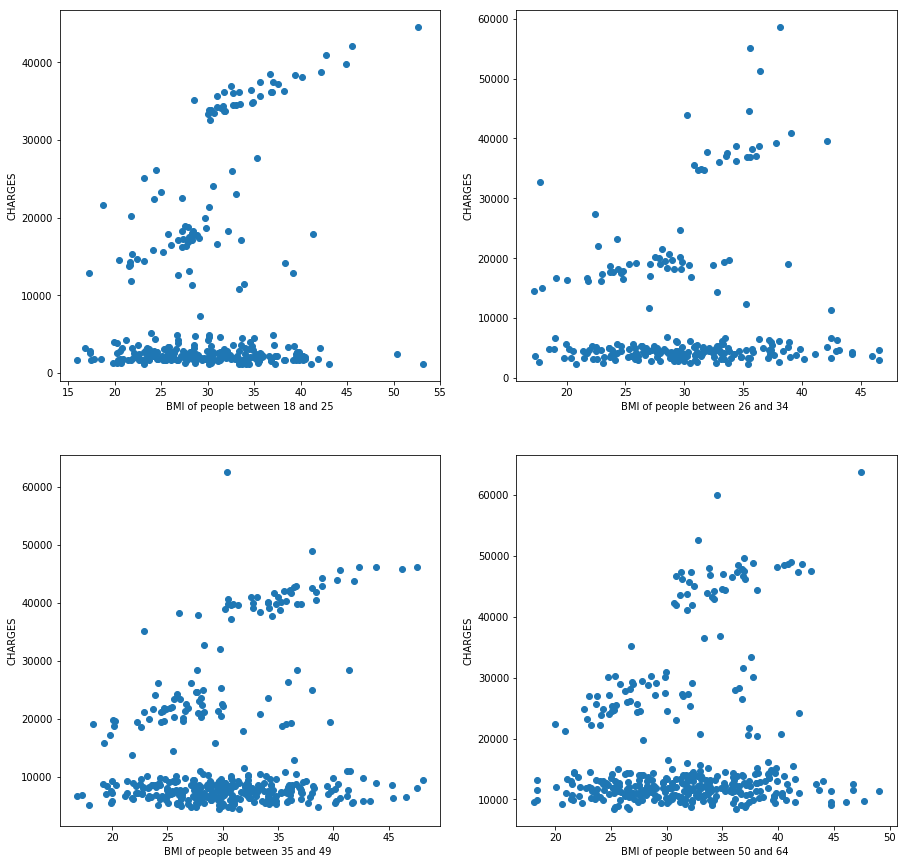

In [49]:
#relation between BMI and CHARGES


plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
scatter_plot(data_u25['bmi'],data_u25['charges'],'BMI of people between 18 and 25','CHARGES')
plt.subplot(2,2,2)
scatter_plot(data_u34['bmi'],data_u34['charges'],'BMI of people between 26 and 34 ','CHARGES')
plt.subplot(2,2,3)
scatter_plot(data_u49['bmi'],data_u49['charges'],'BMI of people between 35 and 49 ','CHARGES')
plt.subplot(2,2,4)
scatter_plot(data_u64['bmi'],data_u64['charges'],'BMI of people between 50 and 64 ','CHARGES')

In the above scatter plots we can see clusters forming in 3 areas.Let's see what we can understand from this.

##### Clusters
the first cluster(top one)indicates a direct relation between BMI and charges .the more the BMI the more the expense.

the second cluster(middle one) indicates that the medical charges are not too much related to BMI of the respective person,ie. BMI is the not the main reason for their medical expenses.although it is important.

the third cluster(bottom one) has those people whose medical charges are very less or not related to thier BMI.

##### density of points in these clusters-
if we look closely in these plots the density of points in the third cluster(bottom one) is maximum in the 4th plot ie of people of age group 50 to 64.when a human starts aging there are many complications and problems happens with age which they have to take care and these are not related to BMI.

the people of age group 18-25 and 26-34 are the most active ones and usually they dont face problems because of BMI. the second cluster (middle one) of the first and second plot illustrates this.

the third plot is of people of age between 35 and 49.they share common things with everyone,a direct relation can be observed between BMI and charges from the first cluster,there are people who are active and there is a randomness in the second cluster and a dense region in the third cluster also as the aging factor starts hitting.



In [50]:
def boxplot(x,y):
    sns.boxplot(x=x,y=y)

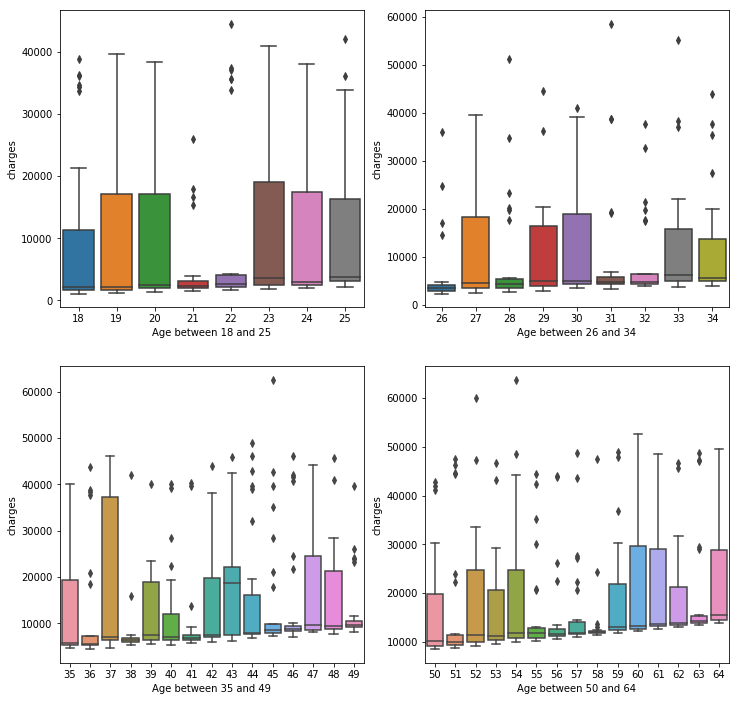

In [51]:
#medical charges according to age 


plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
boxplot(x=data_u25['age'],y=data_u25['charges']) 
plt.xlabel('Age between 18 and 25')
plt.subplot(2,2,2)
boxplot(x=data_u34['age'],y=data_u34['charges']) 
plt.xlabel('Age between 26 and 34')
plt.subplot(2,2,3)
boxplot(x=data_u49['age'],y=data_u49['charges']) 
plt.xlabel('Age between 35 and 49')
plt.subplot(2,2,4)
boxplot(x=data_u64['age'],y=data_u64['charges']) 
plt.xlabel('Age between 50 and 64');

These boxplot shows the relation between age and charges and we can clearly see that the conclusions we came up with the BMI and charges relation are being justified here.

the minimum medical charges of people are increasing with age and in the fourth boxplot we can clearly see the incline,even the mean medical charge is greater than 10000 for everyone.

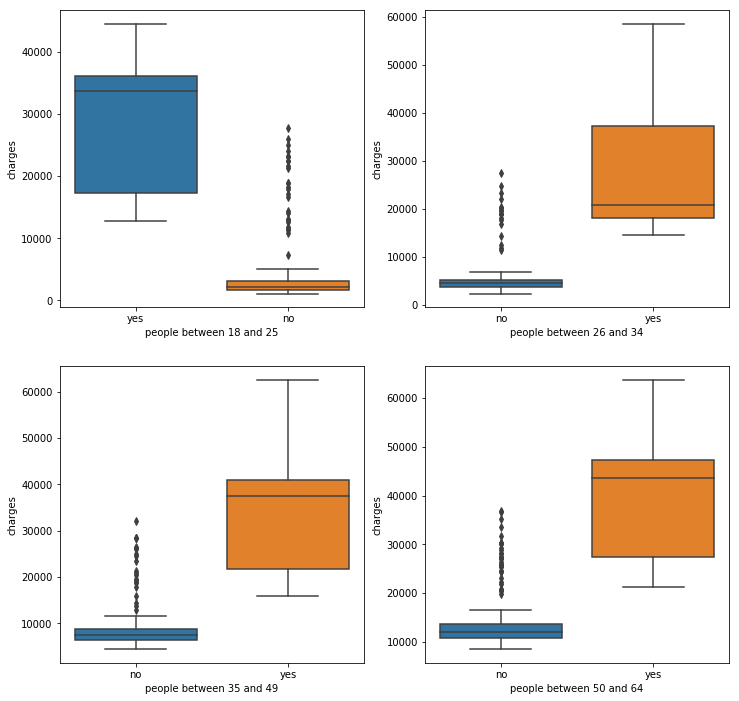

In [52]:
#medical charges for people who smoke vs who don't smoke


plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
boxplot(data_u25['smoker'],data_u25['charges'])
plt.xlabel('people between 18 and 25')
plt.subplot(2,2,2)
boxplot(data_u34['smoker'],data_u34['charges'])
plt.xlabel('people between 26 and 34')
plt.subplot(2,2,3)
boxplot(data_u49['smoker'],data_u49['charges'])
plt.xlabel('people between 35 and 49')
plt.subplot(2,2,4)
boxplot(data_u64['smoker'],data_u64['charges'])
plt.xlabel('people between 50 and 64');

 #### I don't think i need to explain what these plots are telling us.

In [53]:
data_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


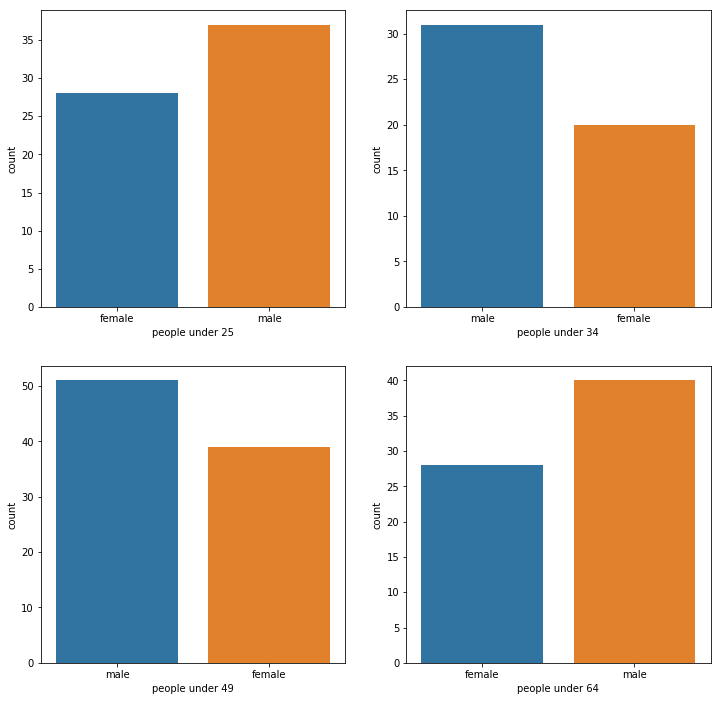

In [54]:
#no of male and female smokers 

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(data_u25.loc[data_u25['smoker']=='yes']['sex'])
plt.xlabel('people under 25')
plt.subplot(2,2,2)
sns.countplot(data_u34.loc[data_u34['smoker']=='yes']['sex'])
plt.xlabel('people under 34')
plt.subplot(2,2,3)
sns.countplot(data_u49.loc[data_u49['smoker']=='yes']['sex'])
plt.xlabel('people under 49')
plt.subplot(2,2,4)
sns.countplot(data_u64.loc[data_u64['smoker']=='yes']['sex'])
plt.xlabel('people under 64');

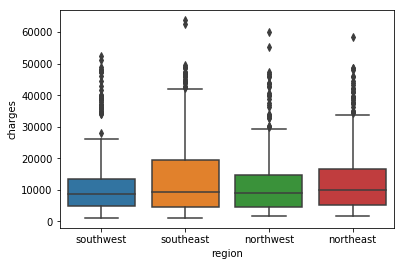

In [55]:
#medical charges in various regions

boxplot(data_1['region'],data_1['charges'])

Age has nothing to do with the relation between region and medical charges,as the charges for a certain work will be same for a 18 years old person and a 50 years old person in the same region.

that's why this boxplot is for the complete dataset.

In [56]:
data_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


For most adults, an ideal BMI is in the 18.5 to 24.9 range.

In [57]:
data_1.loc[(data_1['bmi']>=18.5) & (data_1['bmi']<=24.9)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 3 to 1328
Data columns (total 7 columns):
age         222 non-null int64
sex         222 non-null object
bmi         222 non-null float64
children    222 non-null int64
smoker      222 non-null object
region      222 non-null object
charges     222 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ KB


there are total 222 people with a healthy BMI.

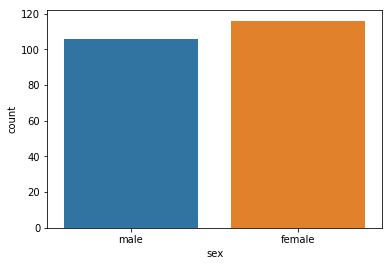

In [58]:
#no of healthy male and females in the dataset

sns.countplot(data_1.loc[(data_1['bmi']>=18.5) & (data_1['bmi']<=24.9)]['sex']);


Clearly we have more number of healthy females than healthy males.

#### If you like this notebook please upvote.
#### Thanks